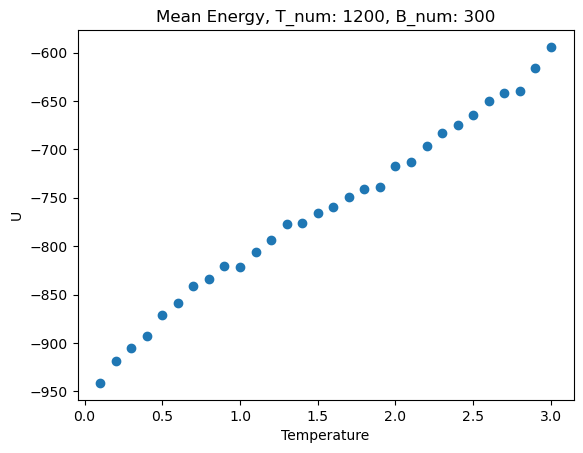

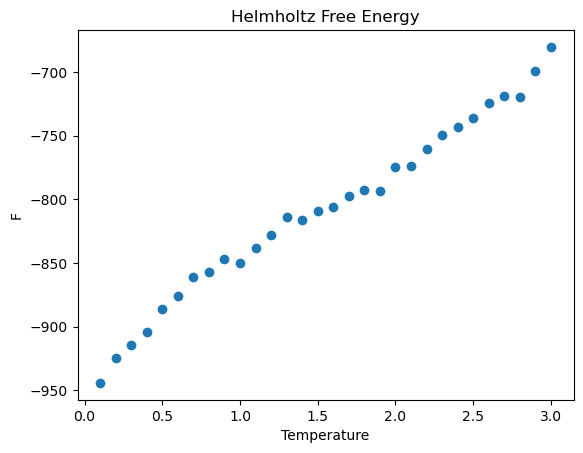

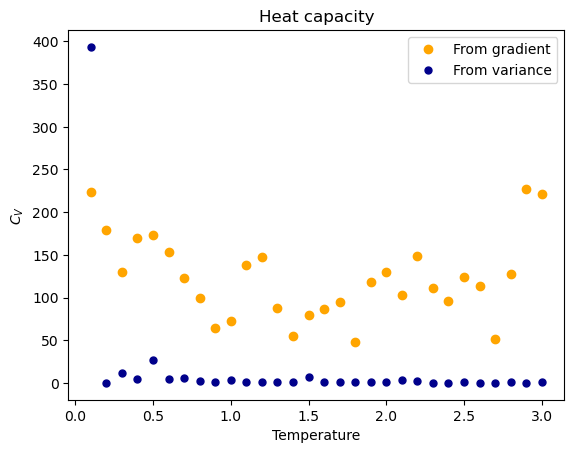

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

file_name = '20231116-22-27_small.npz'

current_dir = os.getcwd()
new_dir = f'{current_dir}/Data/'
file_dir = f'{new_dir}{file_name}'

npzfile = np.load(file_dir)

keys = npzfile.files
for key in keys:
    locals()[key] = npzfile[key]
# print('keys:',keys)    
# keys: ['T', 'eps', 'Tcell_num', 'Bacteria_num', 'E_mean', 'E_variance', 'num_runs']
### NEEDS SIZES STORED AS WELL 

E_var = E_variance


def stirling(x):
    res = x*np.log(x)-x
    return res

def multiplicity(MinLatticeSize, density, d_max):
    n = MinLatticeSize**2*d_max
    N = n/density
    multiplicity = stirling(N)-stirling(n)-stirling(N-n)
    
    num_particles = N
    return num_particles, multiplicity

def the_physics(temperature, density, E_mean, E_var, M):
    
    S_ref = np.log(M)
    Sgrad = np.zeros([len(temperature), len(density)])
    Svar = np.zeros([len(temperature), len(density)])
    
    Cv_gradient = np.zeros([len(temperature), len(density)])
    Cv_variance = np.zeros([len(temperature), len(density)])
    for d in range(len(density)):
        Cv_gradient[:,d] = np.gradient(E_mean[:,d],temperature)
        for i in range(len(temperature)):
            Cv_variance[i,d] = E_var[i,d]/temperature[i]**2
            
        Sgrad[:,d] = S_ref - np.cumsum(Cv_gradient[:,d])
        Svar[:,d] = S_ref - np.cumsum(Cv_variance[:,d])
        F[:,d] = E_mean[:,d] - temperature*Sgrad[:,d]
    
    return Cv_gradient, Cv_variance, Sgrad, Svar, F

Cv_grad, Cv_var, Sgrad, Svar, F =the_physics(T, density, E_mean, E_var, M) 

# FIGURES 

d = 2
# Mean Energy
plt.figure()
plt.plot(T,E_mean[:,d],'o')
plt.xlabel('Temperature')
plt.ylabel('Mean Energy')
#plt.title(f'Mean Energy, T_num: {Tcell_num}, B_num: {Bacteria_num}')
#plt.savefig(f'Runs_data/{datetime_str}U_mean.pdf', format = 'pdf')
plt.show()


# Helmholtz Free Energy
plt.figure()
plt.plot(T,F[:,d],'o')
plt.xlabel('Temperature')
plt.ylabel('F')
#plt.title('Helmholtz Free Energy')
plt.show()

plt.figure()
plt.plot(T,Sgrad[:,d],'o', label = 'from variance' )
plt.plot(T,Svar[:,d],'o', label = 'from gradient' )
plt.xlabel('Temperature')
plt.ylabel('Entropy')
#plt.title('Entropy')
plt.show()

# Heat capacity   
plt.figure()
plt.plot(T,Cv_grad[:,d],'o', color = 'orange', label = 'From gradient')
plt.plot(T,Cv_var[:,d], '.', markersize = '10', color = 'darkblue', label = 'From variance')
plt.xlabel('Temperature')
plt.ylabel('$C_{V}$')
plt.title(f'Heat capacity')
plt.legend()
#plt.savefig(f'Runs_data/{datetime_str}Cv.png')
plt.show()

In [25]:
S

28.772879384443716